In [41]:

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing as pre
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, RocCurveDisplay

# Load data
data = pd.read_csv('final-dataset.csv')
X = data.drop(columns=['Signal', 'Label', 'Hurst Component'])
y = data['Label']

In [42]:
X = pre.scale(X)

In [43]:
# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)


In [50]:
# ========================= Deep Learning Model =========================
def create_model(optimizer='adam', units=64, dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(units, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))  # Dropout to avoid overfitting
    model.add(Dense(1, activation='sigmoid'))  # For binary classification
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model with KerasClassifier for GridSearchCV
model = KerasClassifier(build_fn=create_model, verbose=0)

# Hyperparameter grid for deep learning model
parameters_dl = {
    'batch_size': [16, 32],
    'epochs': [50, 100],
    'optimizer': ['adam', 'sgd'],
    'units': [64, 128],
    'dropout_rate': [0.2, 0.5]
}

# Perform Grid Search for deep learning model
grid_search_dl = GridSearchCV(estimator=model, param_grid=parameters_dl, n_jobs=-1, cv=3)
grid_search_dl.fit(X_train, y_train)

# Get best model for deep learning
best_model_dl = grid_search_dl.best_estimator_

# Predict using deep learning model
y_pred_dl = best_model_dl.predict(x_test)
y_pred_dl = (y_pred_dl > 0.5).astype(int)  # Convert probabilities to binary labels

C:\Users\Yash Srivastava\AppData\Local\Temp\ipykernel_10928\2239493173.py:11: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


7/7 [==============================] - 0s 0s/step


In [51]:
tn_dl, fp_dl, fn_dl, tp_dl = confusion_matrix(y_test, y_pred_dl).ravel()
specificity_dl = tn_dl / (tn_dl + fp_dl)
accuracy_dl = (tp_dl + tn_dl) / (tp_dl + tn_dl + fp_dl + fn_dl)
sensitivity_dl = tp_dl / (tp_dl + fn_dl)

# Print metrics for deep learning model
print("Deep Learning Model Metrics:")
print(f"Specificity: {specificity_dl}")
print(f"Accuracy: {accuracy_dl}")
print(f"Sensitivity: {sensitivity_dl}")

Deep Learning Model Metrics:
Specificity: 0.8207547169811321
Accuracy: 0.8285714285714286
Sensitivity: 0.8365384615384616


C:\Users\Yash Srivastava\AppData\Local\Temp\ipykernel_10928\1230240943.py:24: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


7/7 [==============================] - 0s 993us/step


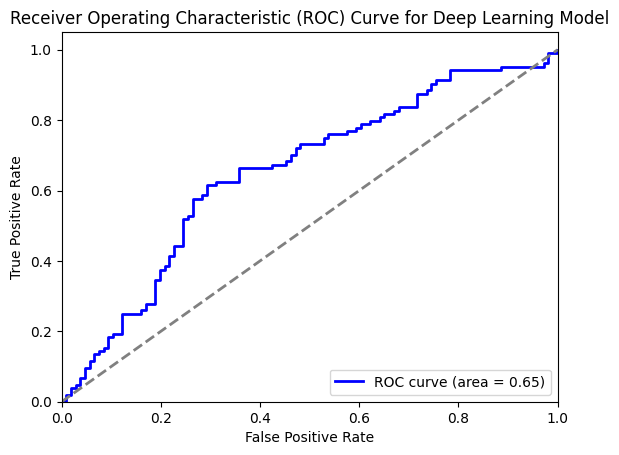

In [53]:
import matplotlib.pyplot as plt  
from sklearn import preprocessing as pre
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay, roc_curve, auc
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming you've already scaled and split the data as shown previously
# X = pre.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

# Define and compile the model
def create_model(optimizer='adam', init='glorot_uniform'):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_initializer=init))  # Use X_train.shape[1] as input_dim
    model.add(Dense(32, activation='relu', kernel_initializer=init))
    model.add(Dense(1, activation='sigmoid'))  # For binary classification
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model in a KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Fit the model
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_pred_proba = model.predict_proba(x_test)[:, 1]  # For binary classification, get probabilities for the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Deep Learning Model')
plt.legend(loc='lower right')
plt.show()
